# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv(r'D:\Навчання\Data Analytics\КУРС DATA ANALIST\python\DATA\yulu_rental.csv')

In [2]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [3]:
df.shape

(10886, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       10886 non-null  int64  
 1   holiday      10886 non-null  int64  
 2   workingday   10886 non-null  int64  
 3   weather      10886 non-null  int64  
 4   temp         10886 non-null  float64
 5   atemp        10886 non-null  float64
 6   humidity     10886 non-null  int64  
 7   windspeed    10886 non-null  float64
 8   casual       10886 non-null  int64  
 9   registered   10886 non-null  int64  
 10  count        10886 non-null  int64  
 11  date         10886 non-null  object 
 12  day          10886 non-null  int32  
 13  week         10886 non-null  UInt32 
 14  weekday_num  10886 non-null  int32  
 15  weekday      10886 non-null  object 
 16  year         10886 non-null  int32  
 17  month        10886 non-null  int32  
 18  hour       

In [6]:
(df.index[1:] - df.index[:-1]).value_counts()

datetime
0 days 01:00:00     10820
0 days 02:00:00        36
12 days 01:00:00       13
11 days 01:00:00        8
0 days 03:00:00         5
0 days 13:00:00         1
9 days 01:00:00         1
10 days 01:00:00        1
Name: count, dtype: int64

Даних 10886 рядків, 19 колонок.  
В основному між записами проходить 1 година. Хоча маємо й записи з інтервалом в 9-12 днів.
Тож можемо сказати, що в переважній більшості рядків сума оренд велосипедів вказана за 1 годину.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


In [9]:
daily_rent = df['count'].resample('D').sum()

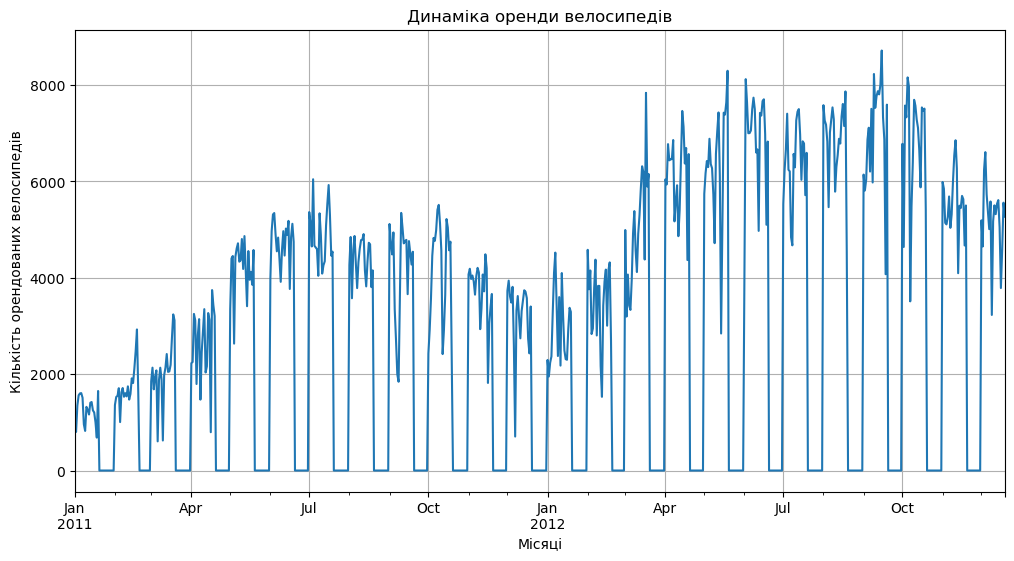

In [32]:
daily_rent.plot(
    figsize = (12, 6),
    title = 'Динаміка оренди велосипедів',
    xlabel = 'Місяці',
    ylabel = 'Кількість орендованих велосипедів',
    grid = True
)
plt.show()

На графіку бачимо дивні 'заломи', при чому вони повторюються з рівною частотою. Можемо припустити, що раз на місяць маємо кількаденні простої в оренді.  
Даний графік досить важко читати, для кращої інформативності буде доцільно згрупувати дані по місяцям.

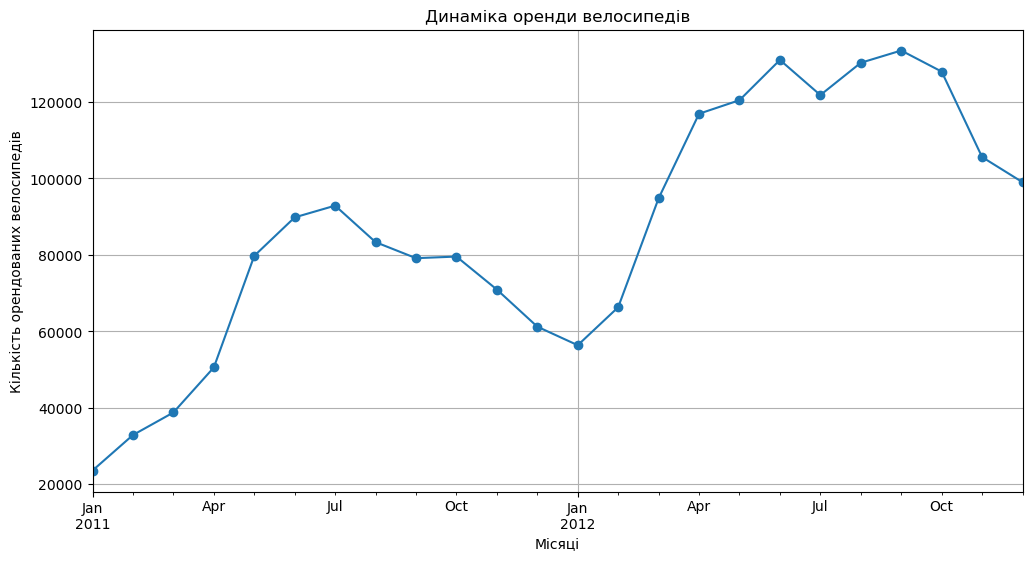

In [33]:
monthly_rent = df['count'].resample('ME').sum()

monthly_rent.plot(
    figsize = (12, 6),
    marker = 'o',
    title = 'Динаміка оренди велосипедів',
    xlabel = 'Місяці',
    ylabel = 'Кількість орендованих велосипедів',
    grid = True
)
plt.show()

На цьому графіку вже можемо побачити деякі тенденції. Так, з графіку видно, що пік оренди велосипедів припадає на весну-літо, а поступовий спад спостерігаємо з початком осені, і з найнижчими показниками у зимові місяці, що є цілком логічним, адже велосипедна оренда є чутливою до погодних умов і менш популярна в холодну пору року.  

Також помітно, що найнижчі показники зафіксовано у січні 2011 року — найпершому місяці наявних даних. Це може свідчити як про низький попит у зимовий період, так і про те, що сервіс щойно розпочав роботу і ще не набрав обертів.

На мою думку, було б доцільно більш детально дослідити щомісячні пропуски днів оренди. Для цього виконаємо наступні розрахунки:

In [29]:
zero_rent_days = daily_rent[daily_rent == 0]

# зрупуємо по місяцях і розрахуємо кількість днів у кожному місяці
zero_rent_per_month = zero_rent_days.groupby(zero_rent_days.index.to_period('M')).count()

print(zero_rent_per_month)

datetime
2011-01    12
2011-02     9
2011-03    12
2011-04    11
2011-05    12
2011-06    11
2011-07    12
2011-08    12
2011-09    11
2011-10    12
2011-11    11
2011-12    12
2012-01    12
2012-02    10
2012-03    12
2012-04    11
2012-05    12
2012-06    11
2012-07    12
2012-08    12
2012-09    11
2012-10    12
2012-11    11
Freq: M, Name: count, dtype: int64


Отже, бачимо що записи відсутні в середньому за 12 днів на місяць. З першого графіку видно, що дні з пропусками йдуть підряд. Тож можна зробити висновок, що має місце технічний збій (дані не збереглися) або закриття для технічного обслуговування велосипедів


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?



In [36]:
def season(month):
    if month in [12, 1, 2]:
        return 'Зима'
    elif month in [3, 4, 5]:
        return 'Весна'
    elif month in [6, 7, 8]:
        return 'Літо'
    elif month in [9, 10, 11]:
        return 'Осінь'

season_avg = df.groupby(df['month'].apply(season))['count'].mean().reindex(['Зима', 'Весна', 'Літо', 'Осінь'])

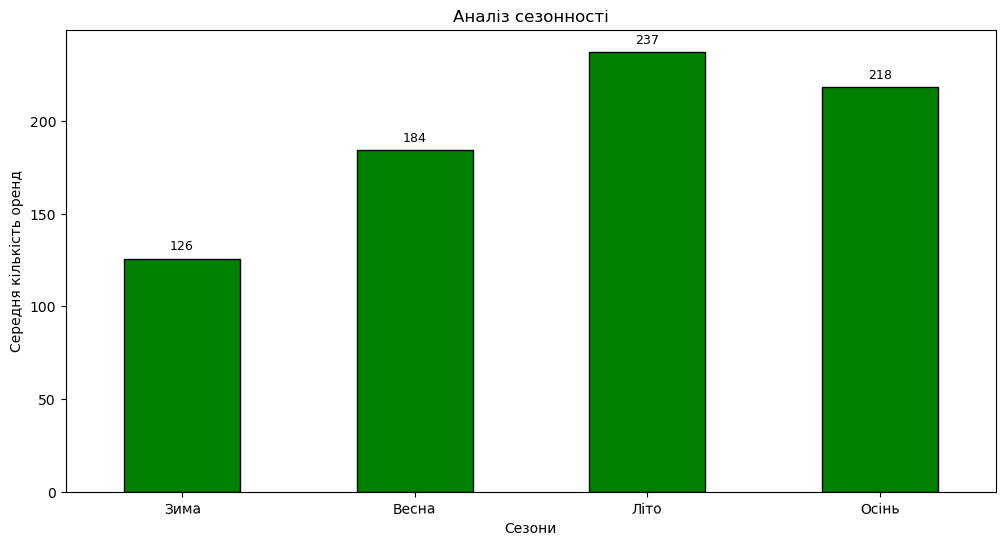

In [57]:
ax = season_avg.plot.bar(
    figsize = (12, 6),
    title = 'Аналіз сезонності',
    xlabel = 'Сезони',
    ylabel = 'Середня кількість оренд',
    color = 'green',
    edgecolor='black',
)
for i, value in enumerate(season_avg):
    ax.text(i, value + 3, f'{value:.0f}', ha='center', va='bottom', fontsize=9)
    
plt.xticks(rotation=1)
plt.show()

In [62]:
max_value = season_avg.max()
min_value = season_avg.min()
ratio = max_value / min_value
print(ratio)

1.8859018495755393



З побудованої діаграми бачимо, що найвища середня кількість оренд велосипедів припадає на літній сезон. Така закономірність є цілком логічною, адже влітку зазвичай сприятливі погодні умови і зростання туристичної активності. У літні місяці люди частіше обирають велосипед як засіб пересування або для активного відпочинку.  

Найнижчі показники припадають на зимовий період, що легко пояснити погодними умовами — холод, опади, короткий світловий день.  

Оренда між найпопулярнішим та найменш популярним сезоном відрізняється в 1,89 рази.

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


In [66]:
monthly_avg = df.groupby(by = ['month'])['count'].mean()

months_labels = ['Січень', 'Лютий', 'Березень', 'Квітень', 'Травень', 'Червень', 
                 'Липень', 'Серпень', 'Вересень', 'Жовтень', 'Листопад', 'Грудень']

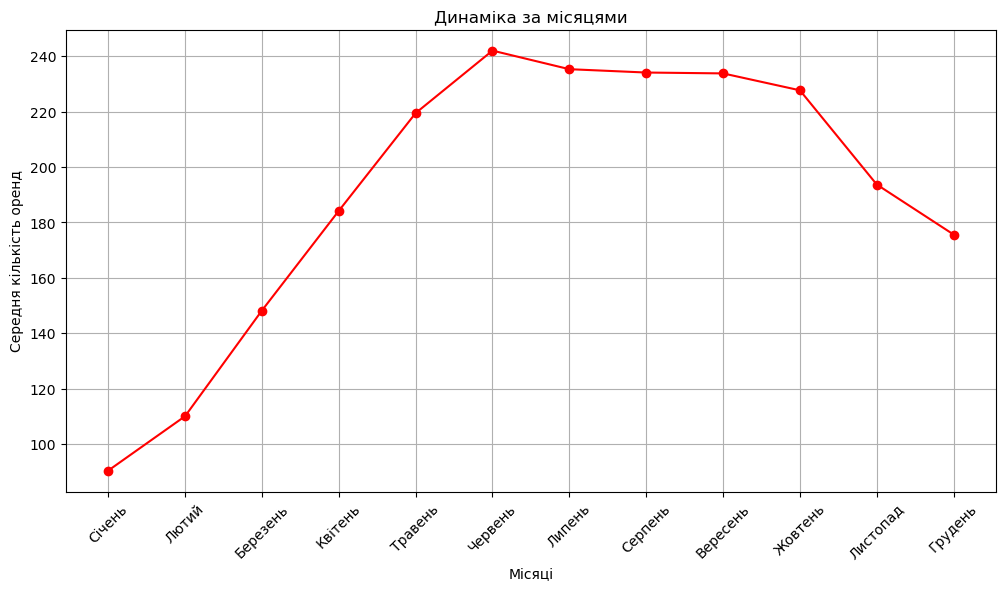

In [67]:
monthly_avg.plot(
    figsize = (12, 6),
    marker = 'o',
    color = 'red',
    title = 'Динаміка за місяцями',
    xlabel = 'Місяці',
    ylabel = 'Середня кількість оренд',
    grid = True
)
plt.xticks(ticks = range(1, 13), labels = months_labels, rotation = 45)
plt.show()

З графіку бачимо, що наші попередні висновки підтвердились, а саме: найвища активність клієнтів спостерігається влітку, з піком у червні. Найнижчі показники фіксуються в січні та лютому. Частково це можна пояснити також тим, що дані в нас наявні саме з січня 2011 року, коли бізнес, ймовірно, тільки розпочав свою діяльність.

кліматичні зміни можуть також впливати на оренду велосипедів. Наприклад затяжна холодна весна сприяє зменшенню попиту, а от суха та тепла осінь, навпаки, може подовжити активний сезон.


## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

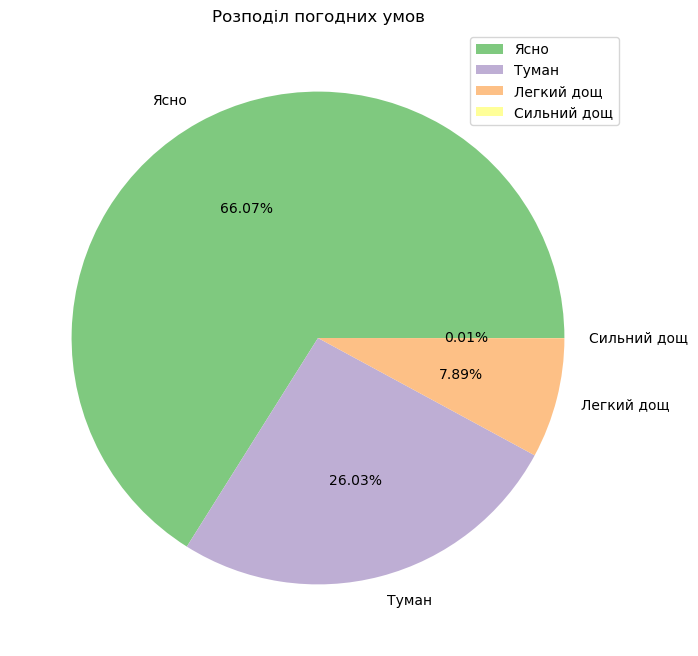

In [83]:
weather_counts = df['weather'].value_counts().sort_index()

weather_counts.plot.pie(
    autopct = '%.f%%',
    labels = ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'],
    colors = plt.cm.Accent.colors,
    legend = True,
    figsize = (8, 8),
    title = 'Розподіл погодних умов'
)

plt.ylabel('')
plt.show()

З діаграми бачимо, що в датасеті переважає сонячна погода.  
Частка днів із сильним дощем не перевищує 0,01%.  
Погодні умови прямо впливають на попит на оренду велосипедів. В хорошу погоду частка оренди значно більша, ніж в дощовий день.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

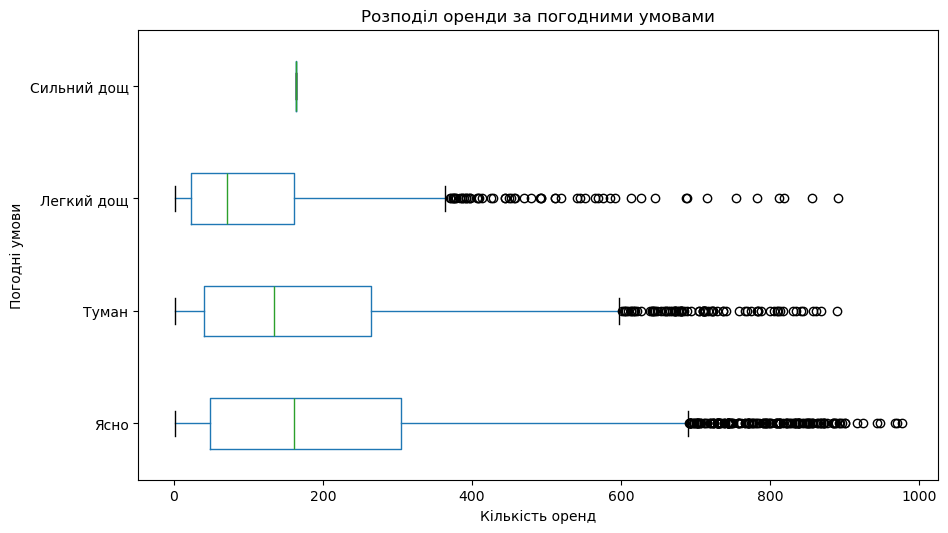

In [96]:
weather_labels = {1: 'Ясно', 2: 'Туман', 3: 'Легкий дощ', 4: 'Сильний дощ'}

ordered_weather = ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ']

df.boxplot(
    column = 'count',
    by = pd.Categorical(
        df['weather'].map(weather_labels),
        categories = ordered_weather,
        ordered = True
    ),
    figsize = (10, 6),
    labels = ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'],
    grid = False,
    vert = False
)
plt.title('Розподіл оренди за погодними умовами')
plt.xlabel('Кількість оренд')
plt.ylabel('Погодні умови')
plt.suptitle('')
plt.show()


In [101]:
median_by_weather = df.groupby('weather')['count'].median()
print(median_by_weather)

weather
1    161.0
2    134.0
3     71.0
4    164.0
Name: count, dtype: float64


Найбільший розкид кількості оренди велосипедів спостерігається при ясній погоді.  

Викиди присутні при всіх типах погоди, окрім сильного дощу. Це може бути пов'язано з тим, що при сильному дощі даних надзвичайно мало — як видно в круговій діаграмі, ця категорія охоплює лише 0,01% усіх записів, тому вона неформує повноцінний розподіл.

Найвище медіанне значення оренди спостерігається при сильному дощі (164), однак ця категорія має надзвичайно малу кількість записів, тому результат може бути випадковим.
Якщо ж орієнтуватися на повніші дані, то ясна погода демонструє високу медіану (161), що відповідає очікуванням — краща погода сприяє збільшенню кількості оренд.

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

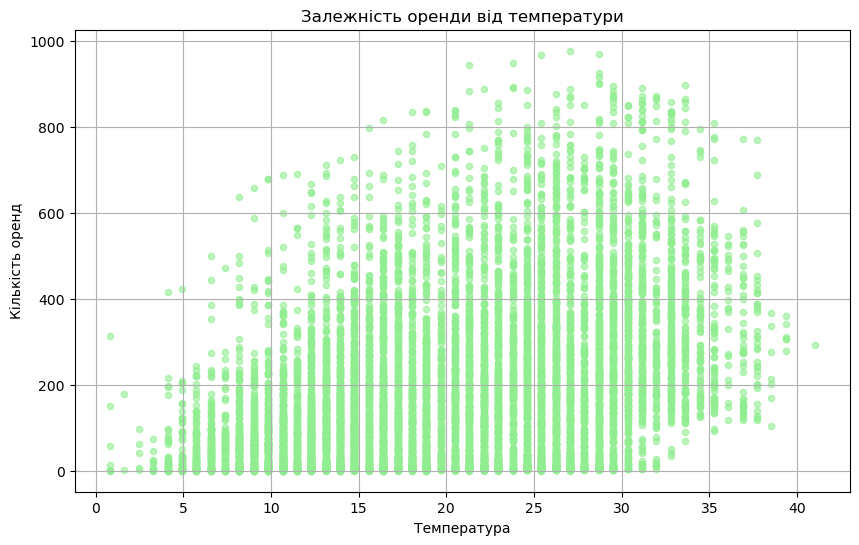

In [106]:
df.plot.scatter(
    x='temp',
    y='count',
    color='lightgreen',
    title='Залежність оренди від температури',
    xlabel='Температура',
    ylabel='Кількість оренд',
    figsize=(10, 6),
    alpha=0.6,
    grid=True
)
plt.show()

З графіку бачимо позитивну кореляцію між температурою повітря та кількістю оренд велосипедів: зі зростанням температури зростає й активність користувачів. Найбільше оренд є в межах температури 20-30 °C. Однак після 30 градусів за Цельсієм кількість оренд велосипедів починає поступово знижуватись. Це може бути пов’язано з дискомфортом під час пересування в умовах спеки.

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

C:\Users\Admin\AppData\Local\Temp\ipykernel_16148\1038658481.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  users = df.groupby('weekday')[['casual', 'registered']].mean()


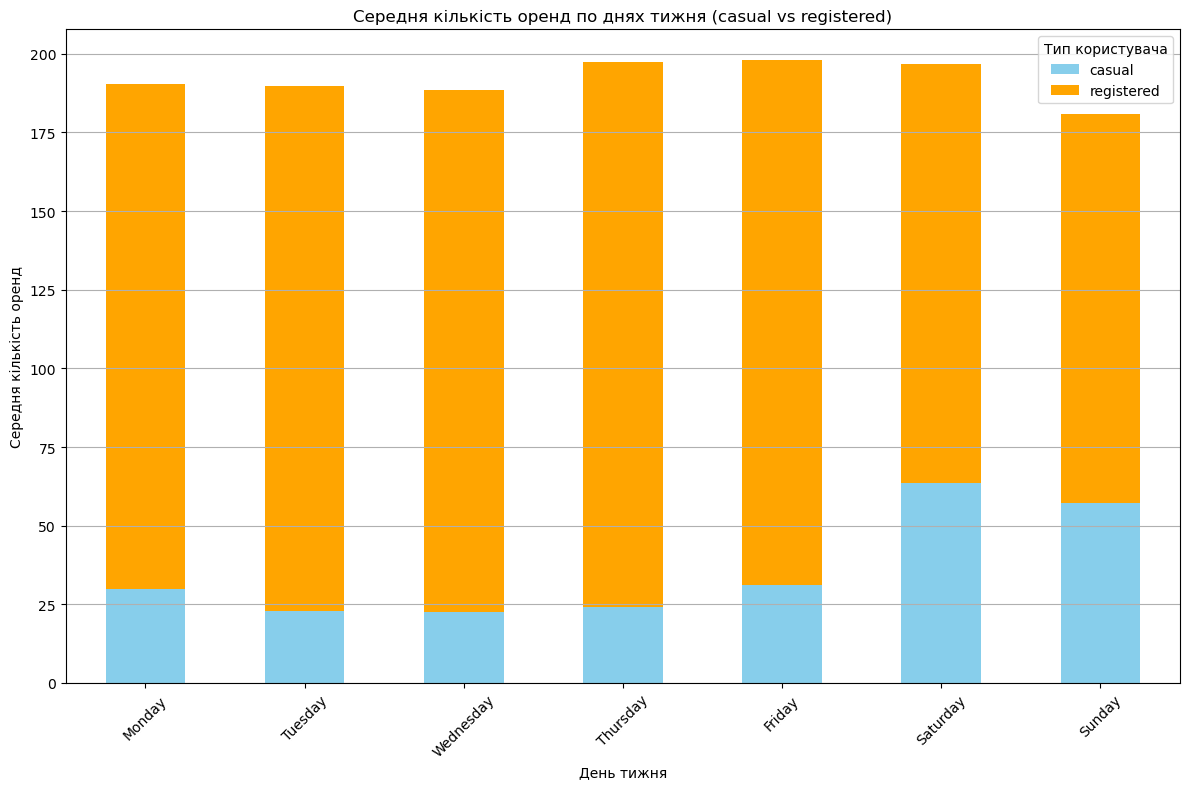

In [113]:
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['weekday'] = pd.Categorical(df['weekday'], categories=ordered_days, ordered=True)

users = df.groupby('weekday')[['casual', 'registered']].mean()

users.plot.bar(
    stacked=True,
    figsize=(12, 8),
    color=['skyblue', 'orange'],
    title='Середня кількість оренд по днях тижня (casual vs registered)',
    xlabel='День тижня',
    ylabel='Середня кількість оренд'
)
plt.xticks(rotation=45)
plt.legend(title='Тип користувача')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Найбільше оренд від зареєстрованих користувачів відбувається в будні дні, зокрема з понеділка по п’ятницю. У ці дні частка зареєстрованих користувачів значно перевищує частку випадкових.
Це може свідчити про те, що зареєстровані користувачі використовують велосипеди здебільшого для щоденних цілей — наприклад, щоб дістатися до роботи або навчання.

Натомість у вихідні дні ми бачимо суттєве зростання частки випадкових користувачів, що може бути пов’язано з відпочинком, прогулянками чи туристичними поїздками. 